# The Best of the Best Models
> In this chapter, you will become a modeler of discerning taste. You'll learn how to identify promising model orders from the data itself, then, once the most promising models have been trained, you'll learn how to choose the best model from this fitted selection. You'll also learn a great framework for structuring your time series projects. This is the Summary of lecture "ARIMA Models in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Time_Series_Analysis]
- image: images/plot_diagnostics.png

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

## Intro to ACF and PACF
- ACF : AutoCorrelation Function \
 : Correlation between time series and the same time series offset by n-step 
    - lag-1 autocorrelation -> $corr(y_t, y_{t-1})$
    - lag-2 autocorrelation -> $corr(y_t, y_{t-2})$
    - $\dots$
    - lag-n autocorrelation -> $corr(y_t, y_{t-n})$
    - If ACF values are small and lie inside the blue shaded region, then they are not statistically significant.
- PACF : Partial AutoCorrelation Function \
  : Correlation between time series and lagged version of itself after we subtract the effect of correlation at smaller lags.
- Using ACF and PACF to choose model order

|      | AR(p)                | MA(q)                | ARMA(p, q) |
|------|----------------------|----------------------|------------|
| ACF  | Tails off            | Cuts off after lag q | Tails off  |
| PACF | Cuts off after lag p | Tails off            | Tails off  |


### AR or MA
In this exercise you will use the ACF and PACF to decide whether some data is best suited to an MA model or an AR model. Remember that selecting the right model order is of great importance to our predictions.

In [2]:
df = pd.read_csv('./dataset/sample2.csv', index_col=0, parse_dates=True)
df = df.asfreq('D')
df.head()

y
2013-01-01  1.624345
2013-01-02 -0.936625
2013-01-03  0.081483
2013-01-04 -0.663558
2013-01-05  0.738023

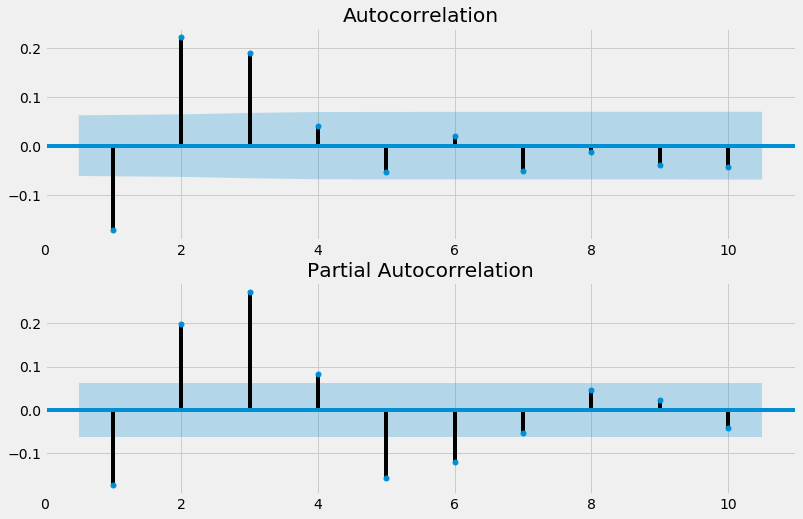

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))

# Plot the ACF of df
plot_acf(df, lags=10, zero=False, ax=ax1);

# Plot the PACF of df
plot_pacf(df, lags=10, zero=False, ax=ax2);

Based on the ACF and PACF plots, This is MA(3) model.

### Order of earthquakes
In this exercise you will use the ACF and PACF plots to decide on the most appropriate order to forecast the earthquakes time series.

In [4]:
earthquake = pd.read_csv('./dataset/earthquakes.csv', index_col='date', parse_dates=True)
earthquake.drop(['Year'], axis=1, inplace=True)
earthquake = earthquake.asfreq('AS-JAN')
earthquake.head()

earthquakes_per_year
date                            
1900-01-01                  13.0
1901-01-01                  14.0
1902-01-01                   8.0
1903-01-01                  10.0
1904-01-01                  16.0

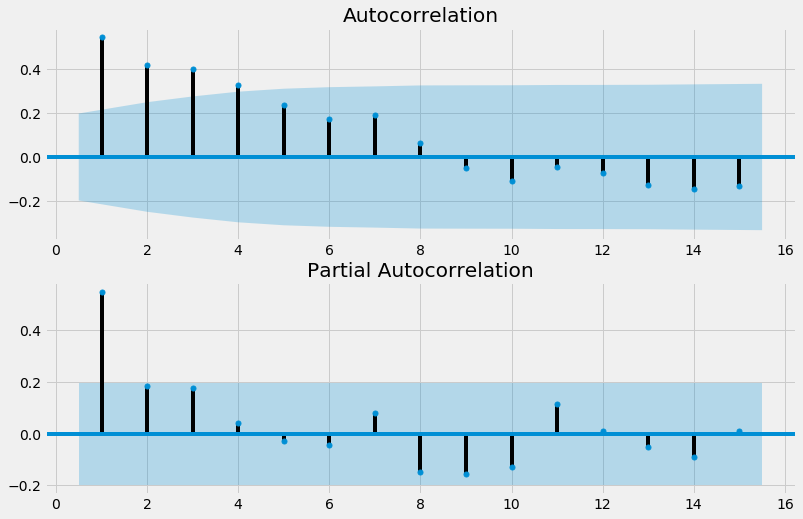

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot ACF and PACF
plot_acf(earthquake, lags=15, zero=False, ax=ax1);
plot_pacf(earthquake, lags=15, zero=False, ax=ax2);

Based on the ACF and PACF plots, This is AR(1) model.

In [6]:
# Instatiate model
model = SARIMAX(earthquake, order=(1, 0, 0))

# Train model
results = model.fit()

## Intro to AIC and BIC
- AIC (Akaike Information Criterion)
    - Lower AIC indicates a better model
    - AIC likes to choose simple models with lower order
- BIC (Bayesian Information Criterion)
    - Very similar to AIC
    - Lower BIC indicates a better model
    - BIC likes to choose simple models with lower order
- AIC vs BIC
    - The difference between two metrics is how much they penalize model complexity
    - BIC favors simpler models than AIC
    - AIC is better at choosing predictive models
    - BIC is better at choosing good explanatory model

### Searching over model order
In this exercise you are faced with a dataset which appears to be an ARMA model. You can see the ACF and PACF in the plot below. In order to choose the best order for this model you are going to have to do a search over lots of potential model orders to find the best set.

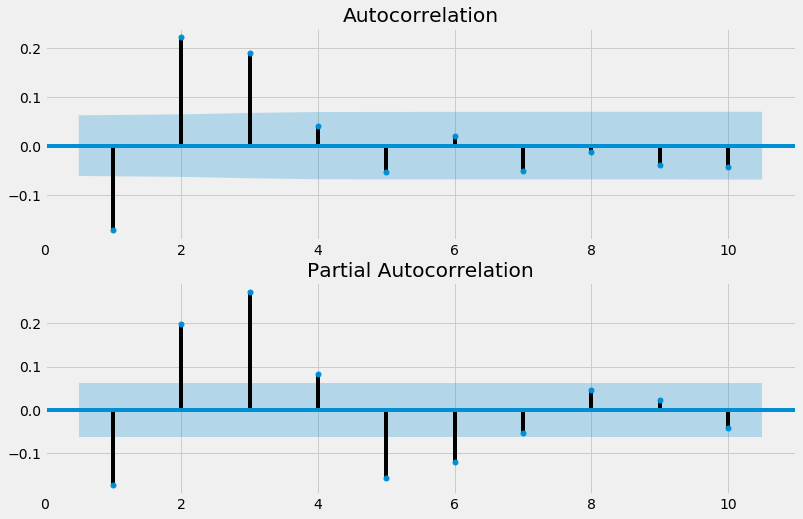

In [7]:
df = pd.read_csv('./dataset/sample2.csv', index_col=0, parse_dates=True)
df = df.asfreq('D')
# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))

# Plot the ACF of df
plot_acf(df, lags=10, zero=False, ax=ax1);

# Plot the PACF of df
plot_pacf(df, lags=10, zero=False, ax=ax2);

In [8]:
# Create empty list to store search results
order_aic_bic = []

# Loop over p values from 0-2
for p in range(3):
    # Loop over q values from 0-2
    for q in range(3):
        # Create and fit ARMA(p, q) model
        model = SARIMAX(df, order=(p, 0, q))
        results = model.fit()
        
        # Append order and results tuple
        order_aic_bic.append((p, q, results.aic, results.bic))

/home/chanseok/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/chanseok/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


### Choosing order with AIC and BIC
Now that you have performed a search over many model orders, you will evaluate your results to find the best model order.

In [9]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q          AIC          BIC
8  2  2  2808.309189  2832.847965
5  1  2  2817.292441  2836.923462
2  0  2  2872.205748  2886.929013
7  2  1  2889.542335  2909.173356
6  2  0  2930.299481  2945.022747
4  1  1  2960.351104  2975.074370
3  1  0  2969.236399  2979.051910
1  0  1  2978.726909  2988.542419
0  0  0  2996.526734  3001.434489
   p  q          AIC          BIC
8  2  2  2808.309189  2832.847965
5  1  2  2817.292441  2836.923462
2  0  2  2872.205748  2886.929013
7  2  1  2889.542335  2909.173356
6  2  0  2930.299481  2945.022747
4  1  1  2960.351104  2975.074370
3  1  0  2969.236399  2979.051910
1  0  1  2978.726909  2988.542419
0  0  0  2996.526734  3001.434489


Based on this result, ARMA(2,2) model is the best fit

### AIC and BIC vs ACF and PACF
In this exercise you will apply an AIC-BIC order search for the earthquakes time series. In the last lesson you decided that this dataset looked like an AR(1) process. You will do a grid search over parameters to see if you get the same results.

In [10]:
# Loop over p values from 0-2
for p in range(3):
    for q in range(3):
        try:
            # Create and fit ARMA(p, q) model
            model = SARIMAX(earthquake, order=(p, 0, q))
            results = model.fit()
            
            # Print order and results
            print(p, q, results.aic, results.bic)
            
        except:
            print(p, q, None, None)

0 0 888.4297722924081 891.0248921425426
0 1 799.6741727812074 804.8644124814766
0 2 761.0674787503889 768.8528383007927
1 0 666.6455255041611 671.8357652044303
1 1 647.1322999673836 654.9176595177873
1 2 648.7385664620616 659.1190458625999
2 0 656.0283744146394 663.8137339650432
2 1 648.8428399959623 659.2233193965006
2 2 648.850644343021 661.826243593694


/home/chanseok/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


## Model diagnostics
- Introduction to model diagnostics
    - How good is the final model?
        - Residual with mean absolute error
        - Normal Q-Q plot
        - Correlogram
        - Summary statistics

### Mean absolute error
Obviously, before you use the model to predict, you want to know how accurate your predictions are. The mean absolute error (MAE) is a good statistic for this. It is the mean difference between your predictions and the true values.

In this exercise you will calculate the MAE for an ARMA(1,1) model fit to the earthquakes time series

4.7556256718469045


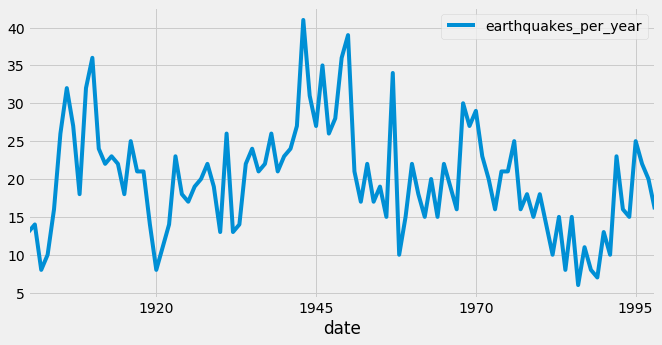

In [11]:
# Fit model
model = SARIMAX(earthquake, order=(1, 0, 1))
results = model.fit()

# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(results.resid))

# Print mean absolute error
print(mae)

# Make plot of time series for comparison
earthquake.plot();

### Diagnostic summary statistics
It is important to know when you need to go back to the drawing board in model design. In this exercise you will use the residual test statistics in the results summary to decide whether a model is a good fit to a time series.

Here is a reminder of the tests in the model summary:

| Test     | Null hypothesis                | P-value                |
|------|----------------------|----------------------|
| Ljung-Box  | There are no correlations in the residual            | Prob(Q) |
| Jarque-Bera | The residuals are normally distributed | Prob(JB)            |


In [12]:
# Create and fit model
model1 = SARIMAX(df, order=(3, 0, 1))
results1 = model1.fit()

# Print summary
print(results1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(3, 0, 1)   Log Likelihood               -1421.678
Date:                Tue, 16 Jun 2020   AIC                           2853.356
Time:                        10:58:31   BIC                           2877.895
Sample:                    01-01-2013   HQIC                          2862.682
                         - 09-27-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0719      0.110     -0.653      0.514      -0.288       0.144
ar.L2          0.2542      0.034      7.573      0.000       0.188       0.320
ar.L3          0.2528      0.039      6.557      0.0

In [13]:
# Create and fit model
model2 = SARIMAX(df, order=(2, 0, 0))
results2 = model2.fit()

# Print summary
print(results2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1462.150
Date:                Tue, 16 Jun 2020   AIC                           2930.299
Time:                        10:58:31   BIC                           2945.023
Sample:                    01-01-2013   HQIC                          2935.895
                         - 09-27-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1361      0.031     -4.400      0.000      -0.197      -0.075
ar.L2          0.2005      0.032      6.355      0.000       0.139       0.262
sigma2         1.0901      0.043     25.360      0.0

### Plot diagnostics
It is important to know when you need to go back to the drawing board in model design. In this exercise you will use 4 common plots to decide whether a model is a good fit to some data.

Here is a reminder of what you would like to see in each of the plots for a model that fits well:

| Test     | Good fit                |
|------|----------------------|
| Standardized residual  | There are no obvious patterns in the residuals            |
| Histogram plus kde estimate | The KDE curve should be very similar to the normal distribution |
| Normal Q-Q | Most of the data points should lie on the straight line |
| Correlogram | 95% of correlations for lag greater than one should not be significant |



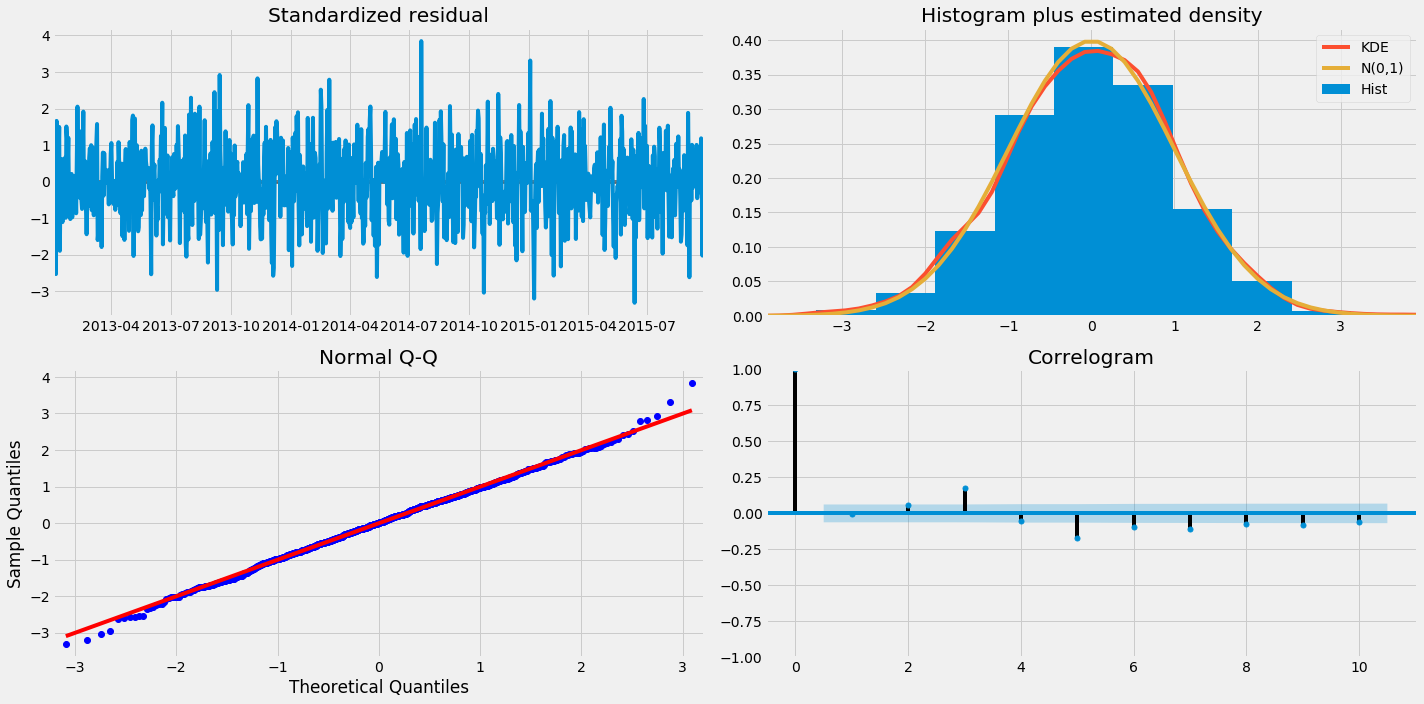

In [15]:
# Create and fit model
model = SARIMAX(df, order=(1, 1, 1))
results=model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics(figsize=(20, 10));
plt.tight_layout();
plt.savefig('../images/plot_diagnostics.png')

## Box-Jenkins method
![box_jenkins](image/box_jenkins.png)
- From raw data -> production model
    - identification
    - estimation
    - model diagnostics
- Identification
    - Is the time series stationary?
    - What differencing will make it stationary?
    - What transforms will make it stationary?
    - What values of p and q are most promising?
- Estimation
    - Use the data to train the model coefficient
    - Done for us using ```model.fit()```
    - Choose between models using AIC and BIC
- Model Diagnostics
    - Are the residuals uncorrelated
    - Are residuals normally distributed


### Identification
In the following exercises you will apply to the Box-Jenkins methodology to go from an unknown dataset to a model which is ready to make forecasts.

You will be using a new time series. This is the personal savings as % of disposable income 1955-1979 in the US.

The first step of the Box-Jenkins methodology is Identification. In this exercise you will use the tools at your disposal to test whether this new time series is stationary.

In [31]:
savings = pd.read_csv('./dataset/savings.csv', parse_dates=True, index_col='date')
savings = savings.asfreq('QS')
savings.head()

savings
date               
1955-01-01      4.9
1955-04-01      5.2
1955-07-01      5.7
1955-10-01      5.7
1956-01-01      6.2

(-3.1858990962421405, 0.020815541644114133, 2, 99, {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}, 188.1686662239687)
0.020815541644114133


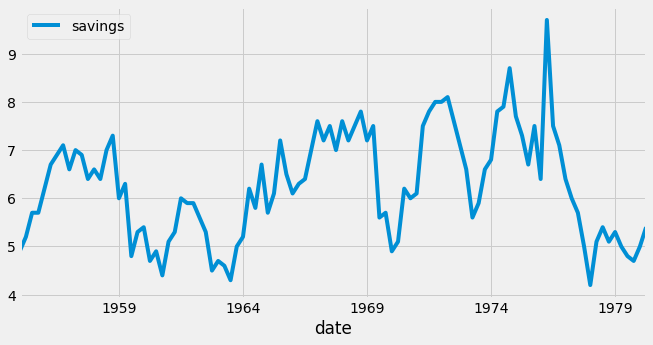

In [35]:
from statsmodels.tsa.stattools import adfuller

# Plot time series
savings.plot();

# Run Dicky-Fuller test
result = adfuller(savings['savings'])

# Print test statistics
print(result[0])

# Print p-value
print(result[1])

### Identification II
You learned that the savings time series is stationary without differencing. Now that you have this information you can try and identify what order of model will be the best fit.

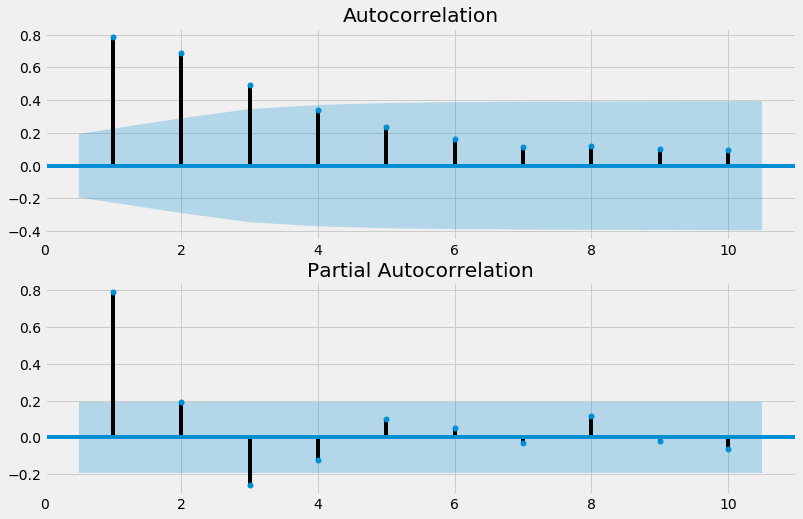

In [38]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot the ACF of savings on ax1
plot_acf(savings, lags=10, zero=False, ax=ax1);

# Plot the PACF of savings on ax2
plot_pacf(savings, lags=10, zero=False, ax=ax2);

The ACF and the PACF are a little inconclusive for this ones. The ACF tails off nicely but the PACF might be tailing off or it might be dropping off. So it could be an ARMA(p,q) model or a AR(p) model.

### Estimation
In the last exercise, the ACF and PACF were a little inconclusive. The results suggest your data could be an ARMA(p,q) model or could be an imperfect AR(3) model. In this exercise you will search over models over some model orders to find the best one according to AIC.

In [39]:
# Loop over p values from 0-3
for p in range(4):
    
    # Loop over q values from 0-3
    for q in range(4):
        try:
            # Create and fit ARMA(p, q) model
            model = SARIMAX(savings, order=(p, 0, q), trend='c')
            results = model.fit()
            
            # Print p, q, AIC, BIC
            print(p, q, results.aic, results.bic)
        except:
            print(p, q, None, None)

0 0 313.6028657326894 318.85281135925794
0 1 267.06970976886913 274.94462820872195
0 2 232.16782676455585 242.66771801769295
0 3 217.59720511188743 230.7220691783088
1 0 216.20348062499983 224.07839906485265
1 1 215.7003896386748 226.2002808918119
1 2 207.65298608433693 220.7778501507583
1 3 209.57498691600946 225.32482379571508
2 0 213.9723232754384 224.4722145285755
2 1 213.43035679044817 226.55522085686954


/home/chanseok/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


2 2 209.57903436790426 225.32887124760987
2 3 211.57503208933585 229.94984178232573
3 0 209.5449310791239 222.66979514554527
3 1 210.8214763494127 226.57131322911835
3 2 211.45759881817608 229.83240851116597
3 3 213.54389994712193 234.5436824533961


You didn't store and sort your results this time. But the AIC and BIC both picked the ARMA(1,2) model as the best and the AR(3) model as the second best.

### Diagnostics
You have arrived at the model diagnostic stage. So far you have found that the initial time series was stationary, but may have one outlying point. You identified promising model orders using the ACF and PACF and confirmed these insights by training a lot of models and using the AIC and BIC.

You found that the ARMA(1,2) model was the best fit to our data and now you want to check over the predictions it makes before you would move it into production.

                               SARIMAX Results                                
Dep. Variable:                savings   No. Observations:                  102
Model:               SARIMAX(1, 0, 2)   Log Likelihood                 -98.826
Date:                Tue, 16 Jun 2020   AIC                            207.653
Time:                        10:54:42   BIC                            220.778
Sample:                    01-01-1955   HQIC                           212.968
                         - 04-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6813      0.714      2.356      0.018       0.283       3.080
ar.L1          0.7286      0.111      6.538      0.000       0.510       0.947
ma.L1         -0.0539      0.145     -0.372      0.7

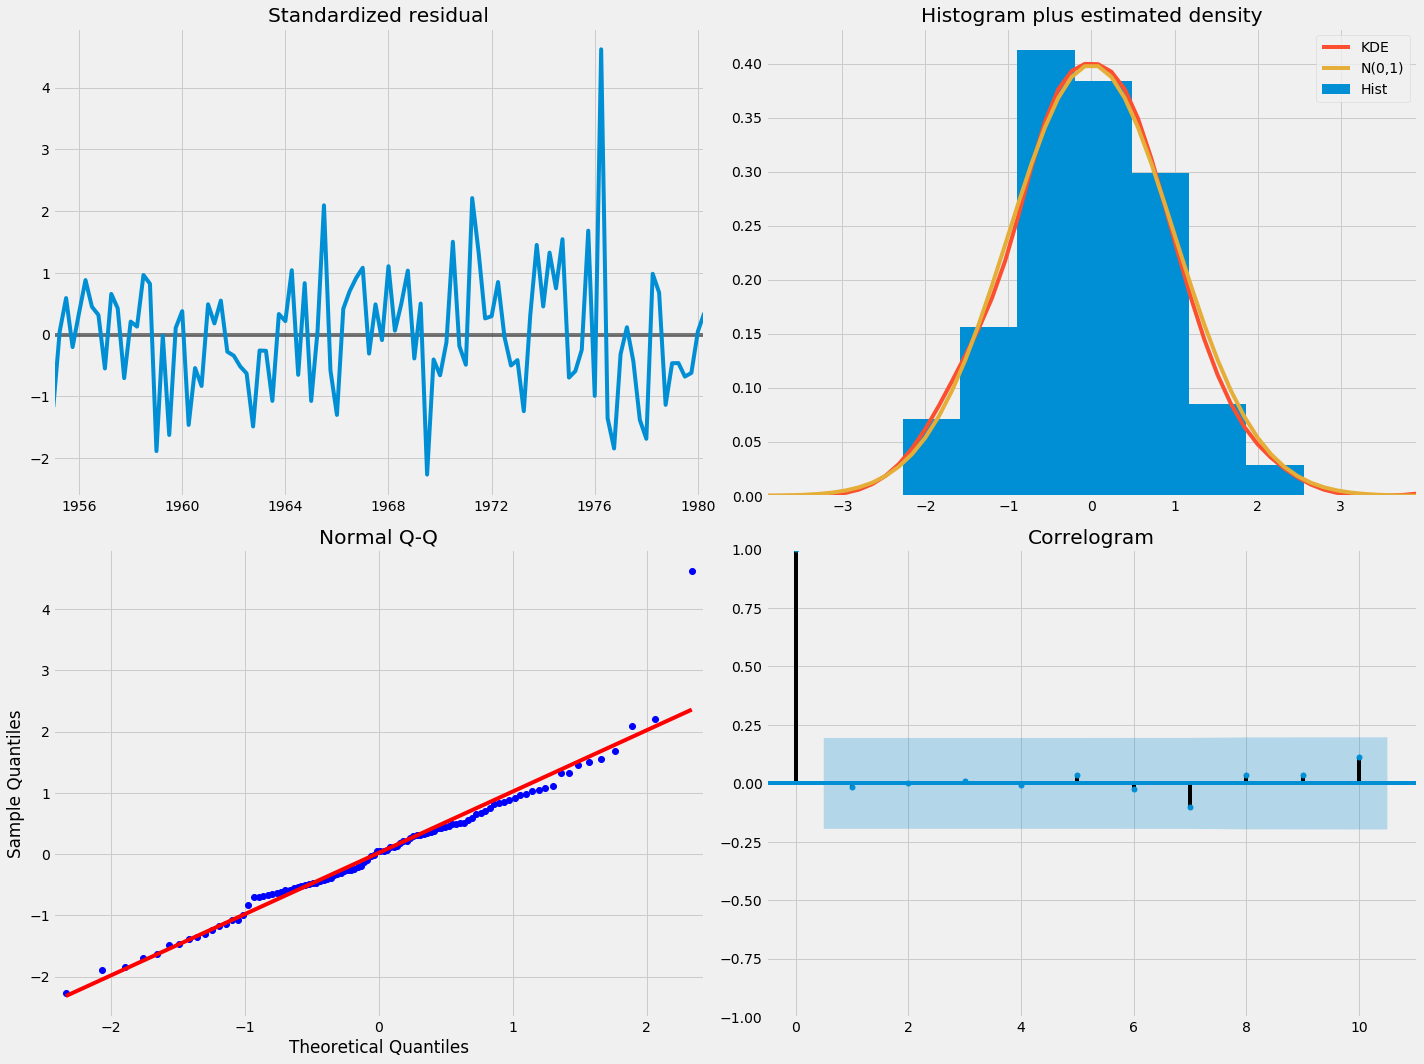

In [41]:
# Create and fit model
model = SARIMAX(savings, order=(1, 0, 2), trend='c')
results = model.fit()

# Create the 4 diagnostics plots
results.plot_diagnostics(figsize=(20, 15));
plt.tight_layout()

# Print summary
print(results.summary())

The JB p-value is zero, which means you should reject the null hypothesis that the residuals are normally distributed. However, the histogram and Q-Q plots show that the residuals look normal. This time the JB value was thrown off by the one outlying point in the time series. In this case, you could go back and apply some transformation to remove this outlier or you probably just continue to the production stage.